x = -4.00, y = 0.00
x = -3.00, y = 0.00
x = -2.00, y = 0.00
x = -1.00, y = 0.00
x = 0.00, y = 0.00
x = 1.00, y = 0.50
x = 2.00, y = 1.00
x = 3.00, y = 1.50
x = 4.00, y = 2.00


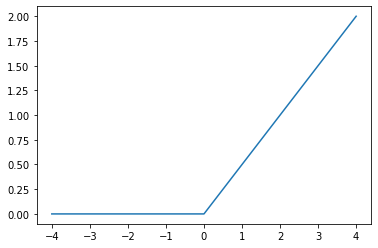

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def QuadraticSpline(x, xi, yi):
    # Quadratic Spline.
    nx = len(xi)
    ny = len(yi)
    assert nx == ny
    assert sorted(xi) == list(xi)

    z = []
    q = []

    z.append(0)

    for i in range(1, nx):
        z.append(-z[i-1] + 2 * (yi[i] - yi[i-1]) / (xi[i] - xi[i-1]))

    assert len(z) == nx

    eq_list = []
    ans = 0

    for i in range(nx - 1):
        a = 0.5 * (z[i+1] - z[i]) / (xi[i+1] - xi[i])
        b = -2 * a * xi[i] + z[i]
        c = a*xi[i]**2 - z[i] * xi[i] + yi[i]
        eq_list.append((a, b, c))

    for i in range(nx - 1):
        if xi[i] <= x <= xi[i+1]:
            ans = eq_list[i][0] * (x-xi[i])**2 + z[i]*(x-xi[i]) + yi[i]
            break
    return ans


def main():
    xi = [0, 1, 2, 3, 4, 5, 6]
    yi = [0, 0.5, 1, 1.5, 2, 2.5, 3]

    x = list(range(-4, 5))
    y = [QuadraticSpline(i, xi, yi) for i in x]
    for i in range(len(y)):
        print(f"x = {x[i]:.2f}, y = {y[i]:.2f}")
    
    plt.plot(x, y)
    plt.show()

main()